In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

<ipython-input-2-71f076060007>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


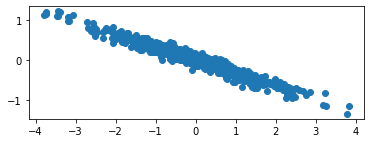

In [2]:
mu, sigma1, sigma2 = 0, 0.1, 1.4 # mean and standard deviation
s1 = np.random.normal(mu, sigma1, 500)
s2 = np.random.normal(mu, sigma2, 500)

alpha = -2.*np.pi*0.2

x=s1*np.cos(alpha)+s2*np.sin(alpha)
y=-s1*np.sin(alpha)+s2*np.cos(alpha)

X = np.transpose([x,y])

plt.scatter(x,y)
plt.axes().set_aspect('equal')

In [3]:
np.shape(X)

(500, 2)

In [4]:
pca = PCA(n_components=2)

pca.fit(X)

PCA(n_components=2)

(500, 2)


<ipython-input-5-f69c0a4de450>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(3)


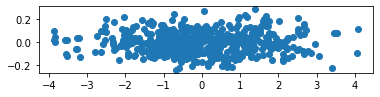

In [5]:
Xt = pca.transform(X)
print(np.shape(Xt))
plt.scatter(Xt[:,0],Xt[:,1])
plt.axes().set_aspect(3)

In [6]:
# Covariance matrices
print(np.cov(X.T))
print(np.cov(Xt.T))

[[ 1.8737166  -0.6020402 ]
 [-0.6020402   0.20347615]]
[[2.06810023e+00 6.25751955e-17]
 [6.25751955e-17 9.09251815e-03]]


In [7]:
ev=pca.transform([[1.,0.],[0.,1.]])
ev

array([[ 1.03594776, -0.30167915],
       [-0.22293537, -0.94604959]])

<ipython-input-8-0280f5d899c9>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


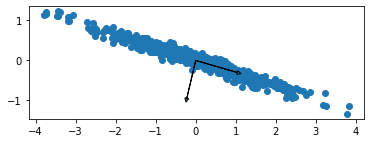

In [8]:
plt.scatter(x,y)
plt.arrow(0,0,ev[0,0],ev[0,1],head_width=0.1, head_length=0.1)
plt.arrow(0,0,ev[1,0],ev[1,1],head_width=0.1, head_length=0.1)
plt.axes().set_aspect('equal')
plt.show()

# Ising

In [9]:
import pickle,os

root='/home/s/Sven.Krippendorf/Nextcloud/ml_physics_lectures/literatureandmaterial/'
root='/Users/sven.krippendorf/Nextcloud/ml_physics_lectures/literatureandmaterial/'

def read_t(root="./"):
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All.pkl','rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600)

In [10]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
X = read_t(root=root)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sven.krippendorf/Nextcloud/ml_physics_lectures/literatureandmaterial/Ising2DFM_reSample_L40_T=All.pkl'

In [ ]:
#np.random.seed(0) # fixing the random seed

idx = np.arange(len(X))
tval = np.hstack([t]*10000 for t in np.arange(0.25,4.01,0.25)) # Temperature values for each sample
rand = np.random.choice(idx, size=5000, replace=False)
Xdownsample = X[rand]
modelPCA = PCA(n_components=2)
XPCA = modelPCA.fit_transform(Xdownsample)
component1 = modelPCA.components_[0]
tval = tval[rand]

In [ ]:
np.shape(Xdownsample)

In [ ]:
plt.scatter(XPCA[:,0],XPCA[:,1],c=tval,cmap="coolwarm") 
plt.xlabel('pca1')
plt.ylabel('pca2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
def magnetization(data):
    configuration = data
    magnetization = np.sum(np.sum(configuration,axis=2),axis=1)
    return magnetization

In [ ]:
L=40
Xreshape=Xdownsample.reshape(len(Xdownsample),L,L)

In [ ]:
plt.scatter(magnetization(Xreshape),XPCA[:,0])

In [ ]:
np.shape(Xdownsample)